<div class="alert alert-block alert-info">
<font size="6"><center><b>📊 United States Marriage & Divorce Rate Statistical Analysis 📈</b></center></font>
</div>

This project is focused on the statistical analysis of the marriage rates and divorce rates of US across the years.

The dataset contains the marriage and divorce rates of the years 1990, 1995 and 1999-2021.
The dataset is downloaded from the following link:
https://www.cdc.gov/nchs/nvss/marriage-divorce.htm

In [1]:
# importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.decomposition import PCA
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

## Data Preparation

### Marriage Rates Dataset

In [2]:
# reading the marriage rates dataset
m_df=pd.read_excel('state-marriage-rates.xlsx', header=5)
m_df

,Unnamed: 0,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,7.577566,7.168500,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,...,9.2,9.2,9.4,9.6,9.9,9.4,10.1,10.8,9.8,10.6
2,Alaska,6.315232,5.696443,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,...,8.2,8.2,8.5,8.1,8.3,8.1,8.9,8.6,9.0,10.2
3,Arizona,5.422112,4.895841,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,...,6.5,6.6,6.7,6.5,6.7,7.6,7.5,8.2,8.8,10.0
4,Arkansas,8.216753,7.776878,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,...,12.4,12.9,13.4,13.4,14.3,14.3,15.4,14.8,14.4,15.3
5,California 1,5.184868,3.183391,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,...,6.3,6.4,6.4,6.1,6.2,6.5,5.8,6.4,6.3,7.9
6,Colorado,7.388935,6.720711,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,...,7.2,7.6,7.4,7.8,8,8.2,8.3,8.2,9.0,9.8
7,Connecticut,5.405762,4.254702,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,...,5.5,5.8,5.8,5.5,5.7,5.4,5.7,5.8,6.6,7.9
8,Delaware,4.869522,4.426388,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,...,5.9,5.9,6.1,6,6.4,6.5,6.5,6.7,7.3,8.4
9,District of Columbia,7.305425,6.540257,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,...,4,4.1,5.2,5.1,5.1,6.2,4.9,6.6,6.1,8.2


**Fixes to be made**
- We can see that the first row of the dataframe is empty, we have to remove that row. Along with that last 8 rows are also not of any use. Ultimately we're going to remove these rows also.
- We've to change the column name of the first column as it is unnamed.
- There are some empty values filled as '---'. We will convert them into NaN and then fill with median of the particular column.
- The name of the state 'California' is written as 'California 1'. We have to change it as well. 

In [3]:
m_df.drop([0,52,53,54,55,56,57,58,59],axis=0, inplace=True)

m_df.rename(columns={'Unnamed: 0':'state'}, inplace=True)
m_df['state'][5]='California'

m_df=m_df.replace({'---':np.nan}) # replacing the --- by NaN value

m_df.columns = [str(col) for col in m_df.columns]
m_numeric_col_names = m_df.select_dtypes(include=['number']).columns
for year in m_numeric_col_names:
    m_df[str(year)].fillna(m_df[str(year)].median(), inplace=True)

m_df

,state,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,7.577566,7.168500,6.697687,6.760408,7.047340,7.147821,7.351544,7.806776,7.817785,...,9.2,9.2,9.4,9.6,9.9,9.4,10.10,10.8,9.8,10.6
2,Alaska,6.315232,5.696443,6.512245,6.683952,6.914078,7.103441,7.407588,7.508836,7.293928,...,8.2,8.2,8.5,8.1,8.3,8.1,8.90,8.6,9.0,10.2
3,Arizona,5.422112,4.895841,5.302995,5.534434,5.834867,5.930541,5.922469,5.780449,5.401091,...,6.5,6.6,6.7,6.5,6.7,7.6,7.50,8.2,8.8,10.0
4,Arkansas,8.216753,7.776878,8.377284,8.863156,9.456845,9.860962,10.040279,10.112026,9.751052,...,12.4,12.9,13.4,13.4,14.3,14.3,15.40,14.8,14.4,15.3
5,California,5.184868,3.183391,5.723191,6.035132,6.278250,6.463590,6.184957,6.441492,6.460467,...,6.3,6.4,6.4,6.1,6.2,6.5,5.80,6.4,6.3,7.9
6,Colorado,7.388935,6.720711,7.273297,7.585728,7.333845,7.425443,6.791807,7.061603,6.452664,...,7.2,7.6,7.4,7.8,8.0,8.2,8.30,8.2,9.0,9.8
7,Connecticut,5.405762,4.254702,5.048401,5.278133,5.553784,5.617858,5.292009,5.368845,5.021023,...,5.5,5.8,5.8,5.5,5.7,5.4,5.70,5.8,6.6,7.9
8,Delaware,4.869522,4.426388,4.951919,5.237957,5.528417,5.613062,5.712872,6.022783,6.571976,...,5.9,5.9,6.1,6.0,6.4,6.5,6.50,6.7,7.3,8.4
9,District of Columbia,7.305425,6.540257,7.773302,7.835377,8.239526,8.149214,8.220425,11.821343,10.791261,...,4.0,4.1,5.2,5.1,5.1,6.2,4.90,6.6,6.1,8.2
10,Florida,6.845467,5.749101,7.070065,7.332063,7.806895,8.125967,8.234362,7.301404,7.009614,...,8.6,8.9,9.0,9.0,9.4,9.3,8.90,8.7,9.9,10.9


### Divorce Rates Dataset
Now we will import the divorce rates dataset and repeat the same steps that we did for marriage rates dataset.

In [4]:
#importing marriage rates dataset

d_df=pd.read_excel('state-divorce-rates.xlsx', header=5)
d_df

,Unnamed: 0,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,3.605842,3.656179,3.572984,3.714296,3.660498,3.77871,3.85369,3.785022,3.68329,...,4.9,4.9,4.9,5.2,5.4,5.4,5.5,5.7,6,6.1
2,Alaska,3.107798,3.223653,3.638874,3.734551,3.580722,3.946655,4.138499,3.951233,4.461784,...,4.2,4.3,4.3,3.9,4.6,4.3,3.9,5,5,5.5
3,Arizona,2.704665,2.914948,2.915899,2.954273,3.479199,3.352007,3.578466,3.89201,3.92915,...,4,4.2,4.3,4.4,4.8,4,4.6,4.6,6.2,6.9
4,Arkansas,3.618108,3.573642,4.017159,4.066925,3.719694,3.926381,4.842516,4.845318,5.011872,...,5.8,6,6.1,6,6.2,6.2,6.4,6.2,6.3,6.9
5,California,---,---,---,---,---,---,---,---,---,...,---,---,---,---,---,---,---,---,---,4.3
6,Colorado,3.049344,2.904583,3.291,3.2736,3.186287,3.566256,3.725048,3.866602,4.073558,...,4.5,4.4,4.4,4.3,4.7,4.7,4.7,4.8,---,5.5
7,Connecticut,2.478369,1.556927,2.690386,2.853612,2.870533,3.168503,3.128197,2.577657,2.761618,...,3.1,3,3.1,3.2,3.3,3.2,3.3,3,2.9,3.2
8,Delaware,2.554356,2.304397,2.915491,2.800952,2.964845,3.079622,3.093239,3.256685,3.383206,...,3.8,3.8,3.7,3.9,3.5,3.9,3.9,4.5,5,4.4
9,District of Columbia,2.593836,2.058035,2.422958,2.521158,2.477045,2.739404,2.832372,2.57705,2.838584,...,2.1,2,1.8,2,2.4,2.9,3.2,3.6,3.2,4.5


**Fixes to be made**
- We can see that the first row of the dataframe is empty, we have to remove that row. Along with that last 8 rows are also not of any use. Ultimately we're going to remove these rows also.
- We've to change the column name of the first column as it is unnamed.
- There are some empty values filled as '---'. We will convert them into NaN and then fill with median of the particular column.

In [5]:
d_df.drop([0,52,53,54,55,56,57,58],axis=0, inplace=True)

d_df.rename(columns={'Unnamed: 0':'state'}, inplace=True)

d_df=d_df.replace({'---':np.nan}) # replacing the --- by NaN value

d_df.columns = [str(col) for col in d_df.columns]
d_numeric_col_names = d_df.select_dtypes(include=['number']).columns
for year in d_numeric_col_names:
    d_df[str(year)].fillna(d_df[str(year)].median(), inplace=True)

d_df

,state,2021,2020,2019,2018,2017,2016,2015,2014,2013,...,2006,2005,2004,2003,2002,2001,2000,1999,1995,1990
1,Alabama,3.605842,3.656179,3.572984,3.714296,3.660498,3.778710,3.853690,3.785022,3.683290,...,4.9,4.9,4.90,5.2,5.4,5.4,5.5,5.7,6.0,6.1
2,Alaska,3.107798,3.223653,3.638874,3.734551,3.580722,3.946655,4.138499,3.951233,4.461784,...,4.2,4.3,4.30,3.9,4.6,4.3,3.9,5.0,5.0,5.5
3,Arizona,2.704665,2.914948,2.915899,2.954273,3.479199,3.352007,3.578466,3.892010,3.929150,...,4.0,4.2,4.30,4.4,4.8,4.0,4.6,4.6,6.2,6.9
4,Arkansas,3.618108,3.573642,4.017159,4.066925,3.719694,3.926381,4.842516,4.845318,5.011872,...,5.8,6.0,6.10,6.0,6.2,6.2,6.4,6.2,6.3,6.9
5,California,2.640367,2.439281,2.867509,2.951789,3.030063,3.168503,3.177654,3.324706,3.405376,...,3.9,3.9,3.85,3.9,4.0,4.0,4.1,4.4,4.6,4.3
6,Colorado,3.049344,2.904583,3.291000,3.273600,3.186287,3.566256,3.725048,3.866602,4.073558,...,4.5,4.4,4.40,4.3,4.7,4.7,4.7,4.8,4.6,5.5
7,Connecticut,2.478369,1.556927,2.690386,2.853612,2.870533,3.168503,3.128197,2.577657,2.761618,...,3.1,3.0,3.10,3.2,3.3,3.2,3.3,3.0,2.9,3.2
8,Delaware,2.554356,2.304397,2.915491,2.800952,2.964845,3.079622,3.093239,3.256685,3.383206,...,3.8,3.8,3.70,3.9,3.5,3.9,3.9,4.5,5.0,4.4
9,District of Columbia,2.593836,2.058035,2.422958,2.521158,2.477045,2.739404,2.832372,2.577050,2.838584,...,2.1,2.0,1.80,2.0,2.4,2.9,3.2,3.6,3.2,4.5
10,Florida,3.428932,2.950540,3.489101,3.617673,3.612112,3.865675,3.956535,3.970182,4.110652,...,4.7,4.6,4.70,5.0,5.1,5.2,5.1,5.1,5.5,6.3


---

## Describing the Data (Descriptive Statistics)

In [6]:
# extracting the years, names of the states for both datasets
m_years = m_df.columns[1:].to_numpy().astype(float)
m_states = m_df.iloc[:,0]
M=m_df.iloc[:,1:]
d_years= d_df.columns[1:].to_numpy().astype(float)
d_states=d_df.iloc[:,0]
D=d_df.iloc[:,1:]

### Marriage Rates

In [7]:
# measure of central tendency and dispersion for the marriage rates
m_numeric_cols = m_df.select_dtypes(include=['number'])

m_statistics = m_numeric_cols.describe().transpose()
m_statistics['kurt'] = m_numeric_cols.apply(stats.kurtosis)
m_statistics['skew'] = m_numeric_cols.apply(stats.skew)

,mean,50%,std,skew,kurt
2021,6.650678,5.931347,3.189655,4.812584,26.207825
2020,5.768062,5.304309,2.562566,4.328550,22.973455
2019,6.690790,6.038471,3.104246,5.029479,27.593178
2018,7.018220,6.391479,3.199434,5.039844,27.340271
2017,7.313672,6.767399,3.386213,5.227871,29.261233
2016,7.426306,6.851633,3.367150,5.134118,28.382695
2015,7.467660,6.856525,3.720305,5.336090,30.325713
2014,7.684381,6.892587,3.931420,5.019795,27.031475
2013,7.522335,6.769738,3.936938,5.225773,29.438534
2012,7.527451,6.800000,4.354771,5.348061,30.368158


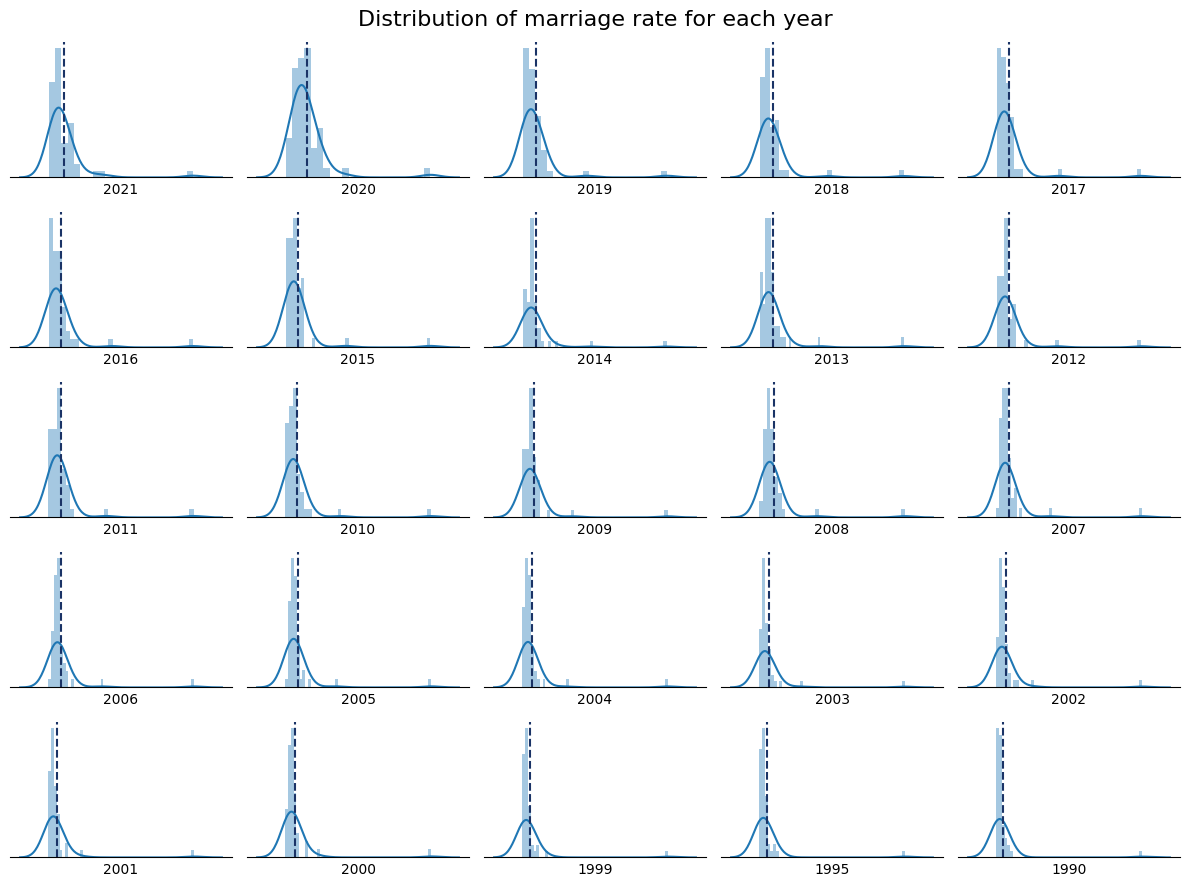

In [8]:
#Distribution of the marriage rates in each year
display(m_statistics[['mean', '50%', 'std','skew','kurt']])

numeric_col_names = m_df.select_dtypes(include=['number']).columns

rows,cols=5,5
fig,ax=plt.subplots(rows,cols,figsize=(12,9))
iteration=0
for row in range(0,rows):
    for col in range(0,cols):
        sns.distplot(m_df[numeric_col_names[iteration]],ax=ax[row,col])
        ax[row,col].get_yaxis().set_visible(False)
        ax[row,col].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)
        ax[row,col].spines['top'].set_visible(False)  # Remove top spine
        ax[row,col].spines['right'].set_visible(False)
        ax[row,col].spines['left'].set_visible(False)
        ax[row,col].axvline(x=m_df[numeric_col_names[iteration]].mean(),color=(0.1, 0.2, 0.4), linestyle='--')
        iteration+=1

plt.suptitle('Distribution of marriage rate for each year', fontsize=16)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Observations based on the measures of central tendency and dispersion</b>

- The mean and median are decreasing over the years. Variance is also decreasing.
- There is significant positive skew meaning that there are some states in each year where there is quite large marriage rate.
- Since, the Kurtosis value is quite large, meaning that the fatness of the tail of the distribution is quite less.
- Marriage rate in each year is roughly following Gaussian distribution.
</div>

### Divorce Rates

In [9]:
# measure of central tendency and dispersion for the divorce rates
d_numeric_cols = d_df.select_dtypes(include=['number'])

d_statistics = d_numeric_cols.describe().transpose()
d_statistics['kurt'] = d_numeric_cols.apply(stats.kurtosis)
d_statistics['skew'] = d_numeric_cols.apply(stats.skew)

,mean,50%,std,skew,kurt
2021,2.688366,2.640367,0.630140,-0.208371,0.436002
2020,2.483192,2.439281,0.638143,0.036304,-0.544323
2019,2.899311,2.867509,0.585630,-0.114216,0.474819
2018,2.987135,2.951789,0.564876,-0.012424,0.307881
2017,3.038383,3.030063,0.561314,0.049655,-0.139161
2016,3.163815,3.168503,0.602343,-0.382805,0.754770
2015,3.246127,3.177654,0.632676,-0.020025,1.372935
2014,3.325317,3.324706,0.700288,0.368455,0.758929
2013,3.440376,3.405376,0.698997,0.258470,-0.074715
2012,3.592157,3.500000,0.702807,0.576112,0.203117


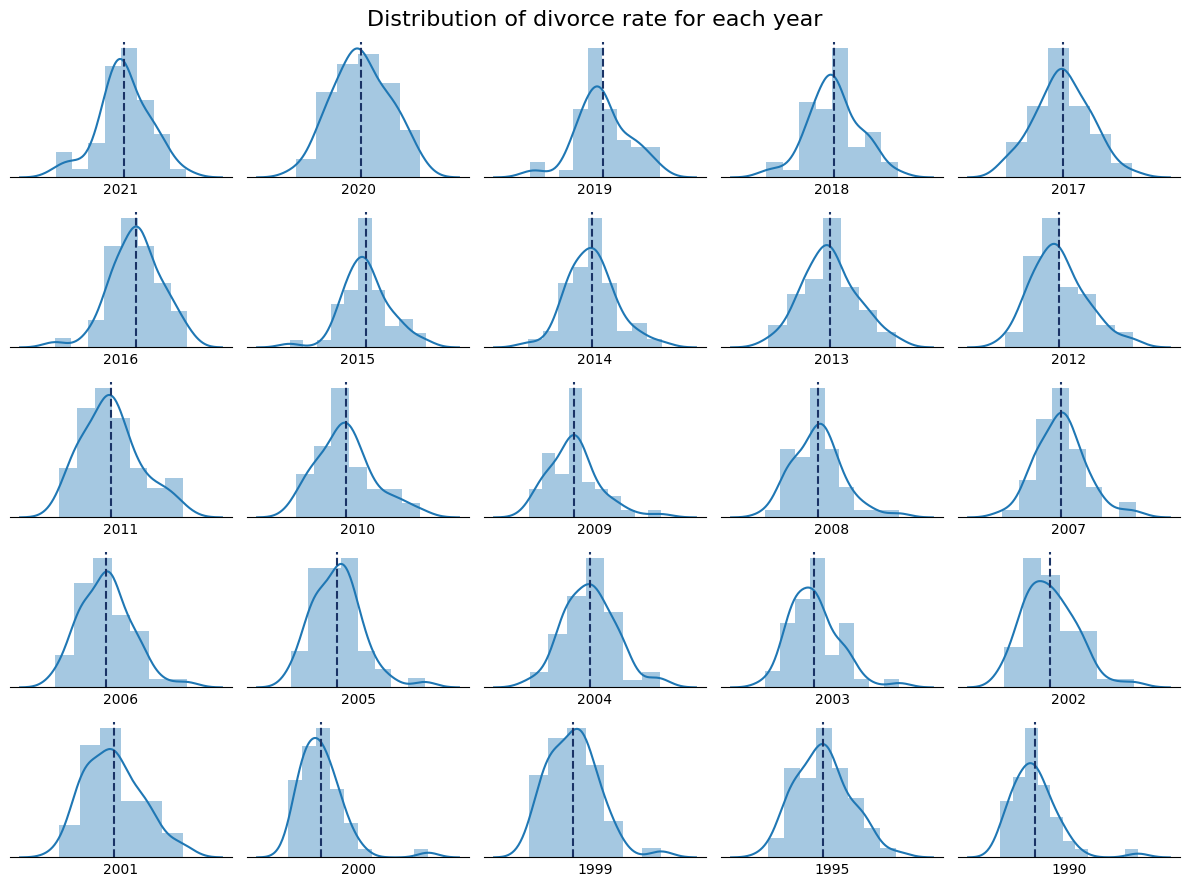

In [10]:
#Distribution of the divorce rates in each year
display(d_statistics[['mean', '50%', 'std','skew','kurt']])

numeric_col_names = d_df.select_dtypes(include=['number']).columns

rows,cols=5,5
fig,ax=plt.subplots(rows,cols,figsize=(12,9))
iteration=0
for row in range(0,rows):
    for col in range(0,cols):
        sns.distplot(d_df[numeric_col_names[iteration]],ax=ax[row,col])
        ax[row,col].get_yaxis().set_visible(False)
        ax[row,col].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelleft=False, labelbottom=False)
        ax[row,col].spines['top'].set_visible(False)  # Remove top spine
        ax[row,col].spines['right'].set_visible(False)
        ax[row,col].spines['left'].set_visible(False)
        ax[row,col].axvline(x=d_df[numeric_col_names[iteration]].mean(),color=(0.1, 0.2, 0.4), linestyle='--')
        iteration+=1

plt.suptitle('Distribution of divorce rate for each year', fontsize=16)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Observations based on the measures of central tendency and dispersion</b>

- The mean and median are decreasing over the years. Variance is also decreasing.
- There is insignificant skew over all the years except the years of 2000 and 1990 meaning that there are some states in these years where there is quite large divorce rate.
- The Kurtosis values are not much significant.
- Divorce rates in each year is roughly following Gaussian distribution.
</div>

## Correlation

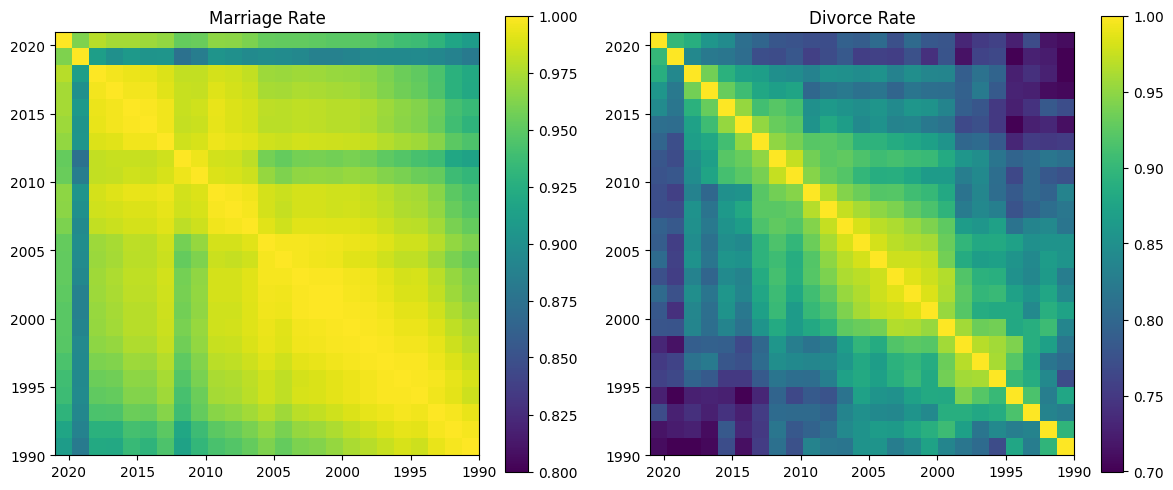

In [11]:
# the correlation matrix (years)

fig,ax=plt.subplots(1,2,figsize=(12,5))

im1=ax[0].imshow(np.corrcoef(M.T),vmin=0.8,vmax=1, extent=[m_years[0],m_years[-1],m_years[-1],m_years[0]])
im2=ax[1].imshow(np.corrcoef(D.T), vmin=0.7, vmax=1, extent=[d_years[0],d_years[-1],d_years[-1],d_years[0]])

plt.colorbar(im1, ax=ax[0])
plt.colorbar(im2, ax=ax[1])

ax[0].set_title('Marriage Rate')
ax[1].set_title('Divorce Rate')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
Correlation of both rates <b>between years</b>

- It is visually evident that there is a high correlation in the marriage rate between the years.
- The same case is for the divorce rate also, but the correlation matrix is saying something else, as the lowest correlation has the correlation coefficient of `0.70`.
    
</div>

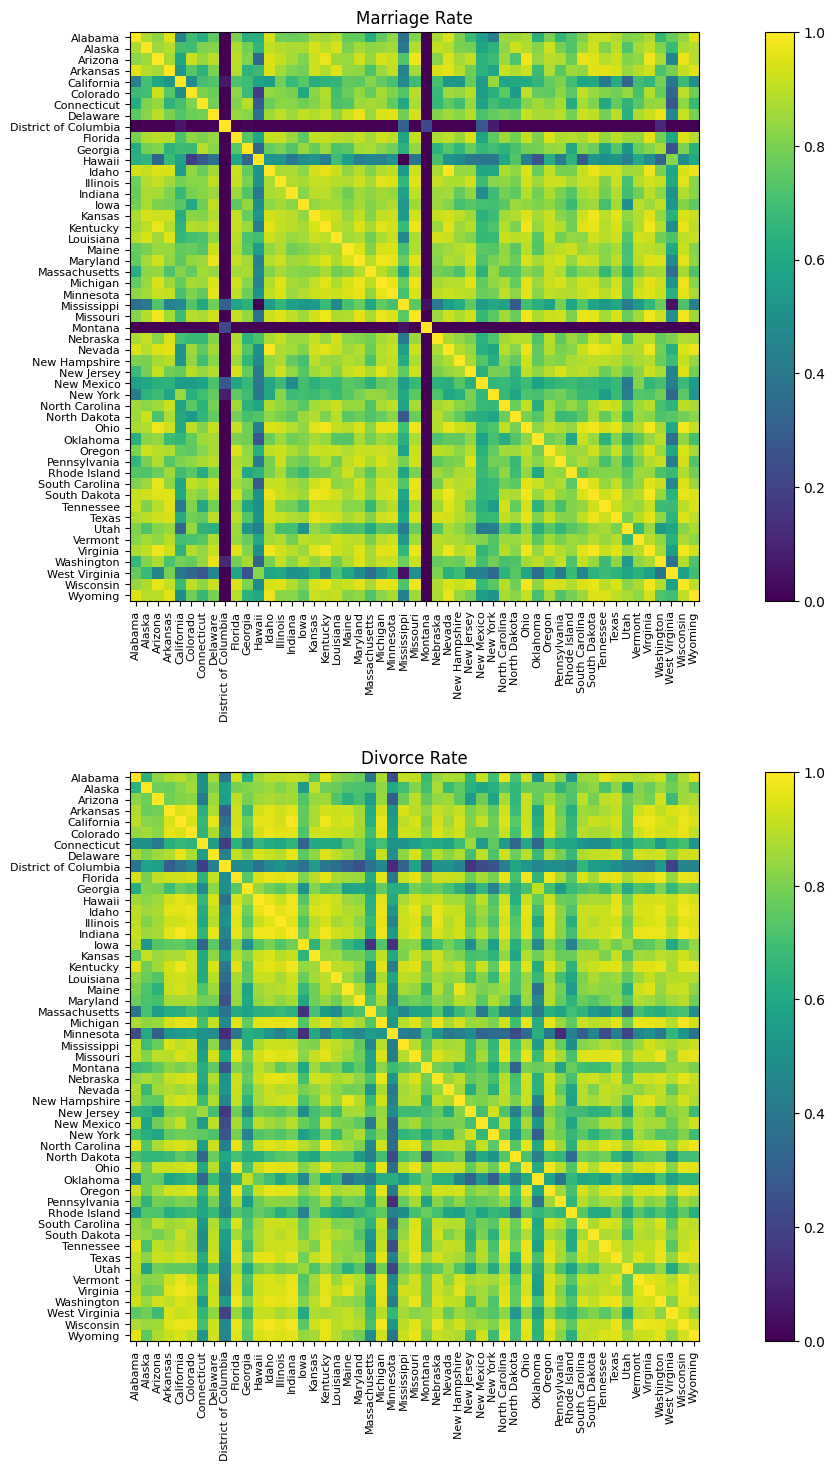

In [12]:
# correlating both rates over states instead of years

fig,ax=plt.subplots(2,1,figsize=(17,17), gridspec_kw={'hspace': 0.3})
im1=ax[0].imshow(np.corrcoef(M),vmin=0,vmax=1)
im2=ax[1].imshow(np.corrcoef(D),vmin=0,vmax=1)

plt.colorbar(im1, ax=ax[0])
plt.colorbar(im2, ax=ax[1])

ax[0].set_title('Marriage Rate')
ax[1].set_title('Divorce Rate')

ax[0].set_xticks(ticks=range(len(m_states)),labels=m_states,rotation=90)
ax[0].set_yticks(ticks=range(len(m_states)),labels=m_states)

ax[1].set_xticks(ticks=range(len(d_states)),labels=d_states,rotation=90)
ax[1].set_yticks(ticks=range(len(d_states)),labels=d_states)

ax[0].tick_params(axis='both', which='both', labelsize=8)
ax[1].tick_params(axis='both', which='both', labelsize=8)

plt.show()

<div class="alert alert-block alert-success">
Correlation of both the rates <b>between states</b>

It is pretty interesting to see that many state pairs are strongly correlated. But there are also some state pairs that are uncorrelated or weakly correlated. The main reason behind this can be of the geography of the states. The neighbouring states may have pretty good correlation. 
</div>

---

## Over the years trend of marriage and divorce rates

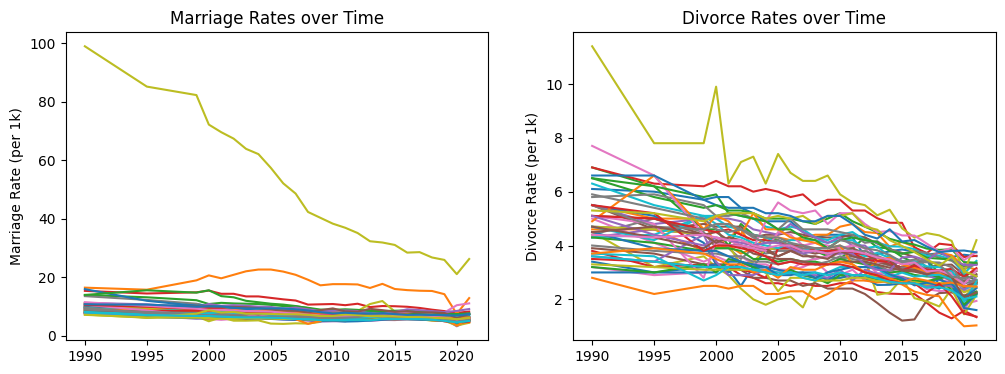

In [13]:
fig,ax = plt.subplots(1,2,figsize=(12,4))

#marriage rates
ax[0].plot(m_years,M.T)
ax[0].set_ylabel('Marriage Rate (per 1k)')
ax[0].set_title('Marriage Rates over Time')

#divorce rates
ax[1].plot(d_years,D.T)
ax[1].set_ylabel('Divorce Rate (per 1k)')
ax[1].set_title('Divorce Rates over Time')

plt.show()

Since, one state has huge marriage rate because of which we are not able to draw any conclusion about the trend of marriage rate over time. So we are going to **z-normalise** the data then analyse the trend of marriage rates over time.

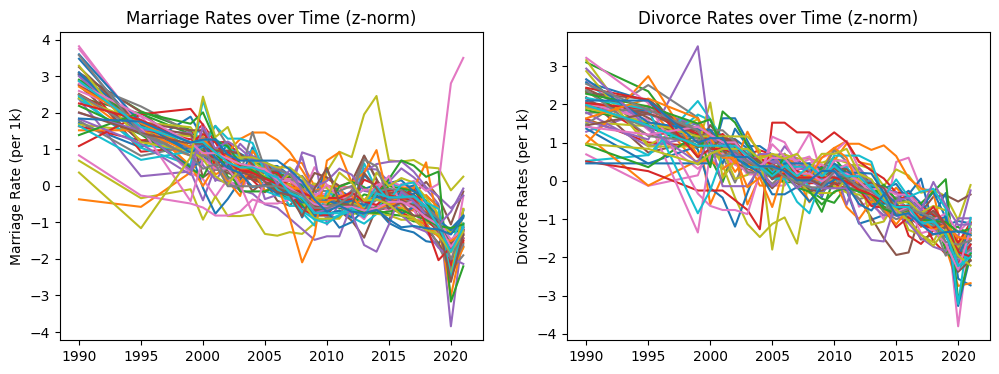

In [14]:
fig,ax= plt.subplots(1,2,figsize=(12,4))

#marriage dataset
ax[0].plot(m_years,stats.zscore(M.T))
ax[0].set_ylabel('Marriage Rate (per 1k)')
ax[0].set_title('Marriage Rates over Time (z-norm)')

#divorce dataset
ax[1].plot(d_years,stats.zscore(D.T))
ax[1].set_ylabel('Divorce Rates (per 1k)')
ax[1].set_title('Divorce Rates over Time (z-norm)')

plt.show()

<div class="alert alert-block alert-success">
The marriage rate tends to decrease over time in almost each state. There are few states where it's quite different.
</div>

Now, let's analyse the trend of average rates.


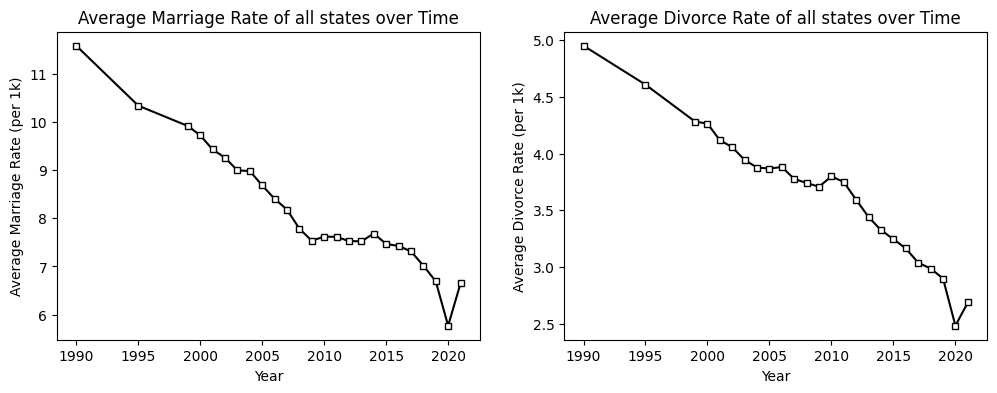

In [15]:
# average of the marriage rate & divorce rate of all states over time
fig,ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(m_years, np.mean(M, axis=0), 'ks-', markerfacecolor='w', markersize=5)
ax[0].set_ylabel('Average Marriage Rate (per 1k)')
ax[0].set_title('Average Marriage Rate of all states over Time')
ax[0].set_xlabel('Year')

ax[1].plot(d_years, np.mean(D, axis=0), 'ks-', markerfacecolor='w', markersize=5)
ax[1].set_ylabel('Average Divorce Rate (per 1k)')
ax[1].set_title('Average Divorce Rate of all states over Time')
ax[1].set_xlabel('Year')

plt.show()

<div class="alert alert-block alert-success">

- The overall marriage rate and divorce rate of the country is decreasing over time.
- Because of unavailability of data of the year between 1990 and 1995, we can see that there isn't any marker in the plot. Similarly for the next few years of 1995.
- In 2020, we have a big fall in both rates and in 2021, both rates again increases back to predicted. This can be becasue of the Covid-19 pandemic which was on surge in the year 2020.
</div>

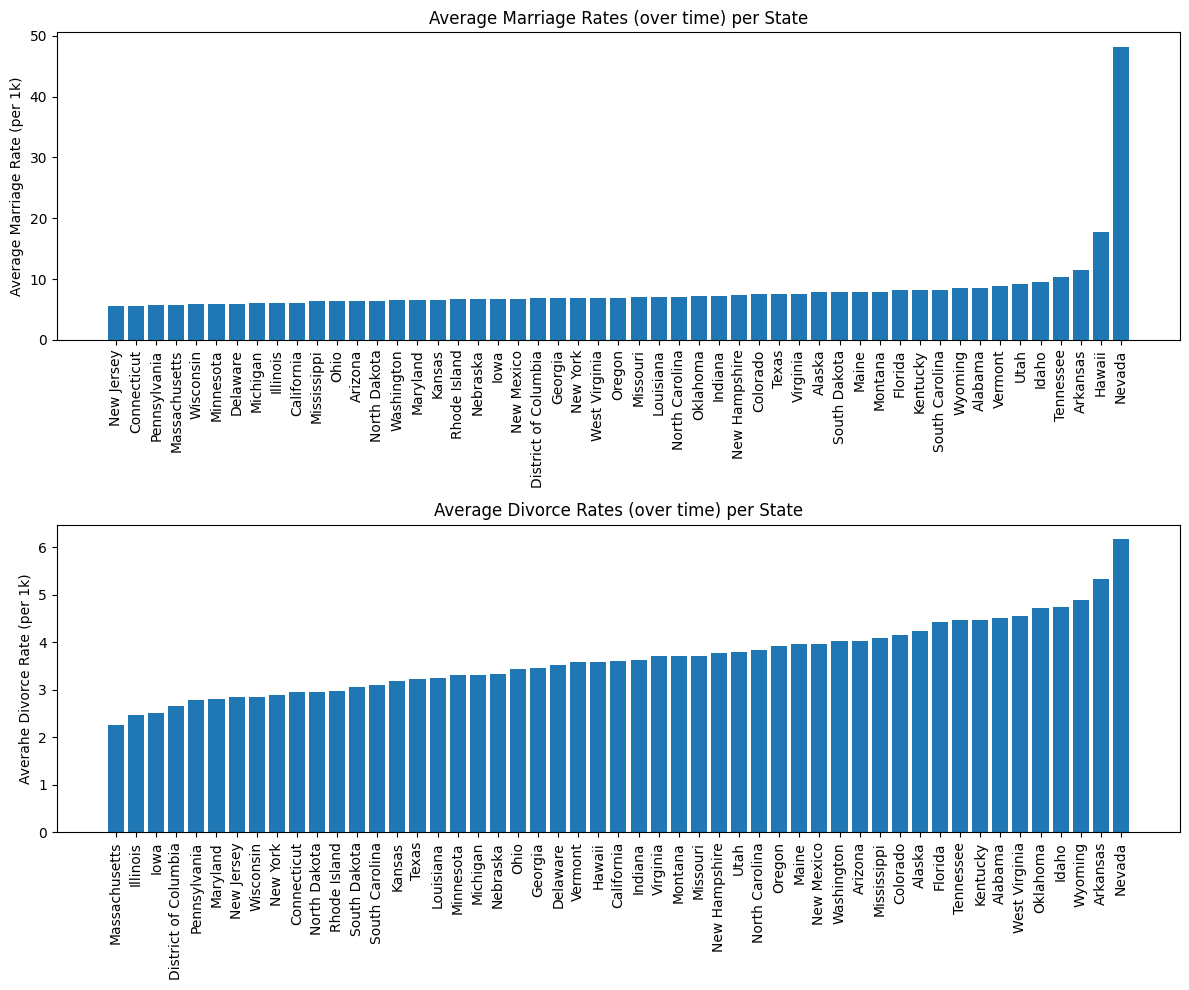

In [16]:
# calculating mean marriage rate and mean divorce rate of each state over time.
meanMrgRate=np.mean(M, axis=1)
meanDrcRate=np.mean(D, axis=1)

# creating new dfs of states and mean marriage rate, similarly for divorce rates
meanMrgRatePlt=pd.concat([pd.DataFrame(m_states)['state'],pd.DataFrame(meanMrgRate)[0]],axis=1)
meanMrgRatePlt.rename(columns={0:'mrg_rate'},inplace=True)
meanMrgRatePlt.sort_values('mrg_rate',ascending=True, inplace=True) # sorting values in ascending order

meanDrcRatePlt=pd.concat([pd.DataFrame(d_states)['state'],pd.DataFrame(meanDrcRate)[0]],axis=1)
meanDrcRatePlt.rename(columns={0:'drc_rate'},inplace=True)
meanDrcRatePlt.sort_values('drc_rate',ascending=True,inplace=True) # sorting values by average divorce rate in ascending order.

# plotting the bar plot for both rates
fig,ax=plt.subplots(2,1,figsize=(12,10))

ax[0].bar(meanMrgRatePlt['state'],meanMrgRatePlt['mrg_rate'])
ax[0].set_ylabel('Average Marriage Rate (per 1k)')
ax[0].set_title('Average Marriage Rates (over time) per State')

ax[1].bar(meanDrcRatePlt['state'],meanDrcRatePlt['drc_rate'])
ax[1].set_ylabel('Averahe Divorce Rate (per 1k)')
ax[1].set_title('Average Divorce Rates (over time) per State')

# rotating the axes of both the plots by 90 degrees
for a in ax.flatten():
    plt.sca(a)
    plt.xticks(rotation=90)

fig.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

- Here arises a question: Is Nevada a non-representative data point or a data error in case of Marriage Rates?<br>
After going through few google searches, I concluded that it is not a data error, it is just a non-representative data point. However, in case of divorce rates it isn't a non-representative data point.
</div>


## Principal Component Analysis

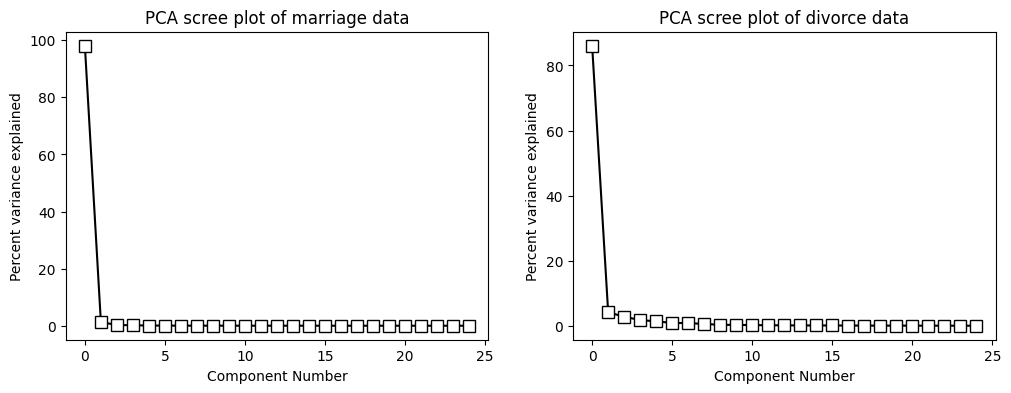

[98.08764719  1.26070063] [86.04987095  4.1702255 ]


In [17]:
pca1 = PCA().fit(M)
pca2 = PCA().fit(D)

# scree plots
fig,ax=plt.subplots(1,2,figsize=(12,4))

ax[0].plot(100*pca1.explained_variance_ratio_,'ks-',markerfacecolor='w',markersize=8)
ax[0].set_ylabel('Percent variance explained')
ax[0].set_xlabel('Component Number')
ax[0].set_title('PCA scree plot of marriage data')

ax[1].plot(100*pca2.explained_variance_ratio_,'ks-',markerfacecolor='w', markersize=8)
ax[1].set_ylabel('Percent variance explained')
ax[1].set_xlabel('Component Number')
ax[1].set_title('PCA scree plot of divorce data')

plt.show()

# printing the % of variance explained by the top 2 components
print(100*pca1.explained_variance_ratio_[0:2],100*pca2.explained_variance_ratio_[0:2])

<div class="alert alert-block alert-success">
<b>Marriage Rate</b>: The first component accounts for 98 % of the total variance. Basically the entire dataset can be captured as one feature, and that one data feature is the general decrease of marriage rate over time.

<b>Divorce Rate</b>: The first component accounts for 86% of the total variance. The second component accounts for 4% of the total variance.
</div>

___

## Inferential Statistics

Our intuition is that the **marriage rate and divorce rate both are strongly and significantly correlated**, which we can see from the plot we did earlier. However, we will test our hypothesis using **Pearson correlation coefficient**. Particularly we will test the correlation of both rates over time per state.

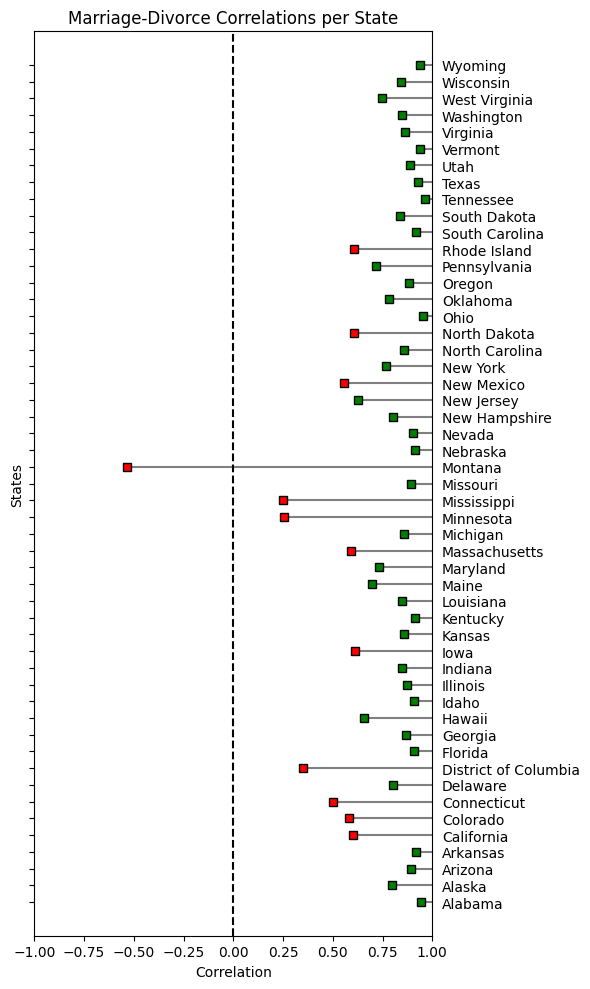

In [18]:
# correlation of both rates over time per state

# Bonferroni corrected threshold
pvalThresh=0.05/51
plt.figure(figsize=(6,10))

color= 'rg'
for s in range(1,len(m_states)+1):
    #computing correlation
    r,p=stats.pearsonr(M.loc[s],D.loc[s])
    # plotting the datapoint in the plot
    plt.plot([r,1],[s,s],'-',color=[.5,.5,.5]) #line
    plt.plot(r,s,'ks',markerfacecolor=color[bool(p<pvalThresh)]) #color dependent point

plt.ylabel('States')
plt.xlabel('Correlation')
plt.title('Marriage-Divorce Correlations per State')
plt.yticks(range(1,len(m_states)+1),labels=d_states)
plt.tick_params(axis='y',which='both',labelleft=False,labelright=True)
plt.xlim([-1,1])
plt.ylim([-1,53])
plt.plot([0,0],[-1,53],'k--')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Observations</b>:
    
- Our intuition was that the marriage and divorce rates would be strongly significantly correlated. As when we have more people getting married, then we're also going to have more people getting divorced and conversely. Similarly when we have less people getting married, then we're also going to have less people gettings divorced. So strong, positive, significant corelations seems to be sensible. 
- But we can see that there are few states having negative correlation, and few having nearly zero correlation. So in `Mississippi` and `Minnesota`, there is basically no relation between marriage rate and divorce rate over time.
- In `Montana` we're having a non-significant negative correlation which is quite surprising. 
</div>

<div class="alert alert-block alert-success">
<b>Why Bonferroni corrected threshold?</b><br>
This corrected p value threshold is actually a little bit conservative because Bonferroni assumes that all of our tests are independent, that they are statistically independent of each other. But that's obviously not the case here, as we saw earlier in the correlation matrix that in neighbouring states, both rates are not independent. It's not reasonable to expect that both rates in one state are totally independent of both rates in the neighbouring state. So to be on the safe side, Bonferroni thresold gives us a conservative threshold.
</div>

❓Now arises one question **whether the marriage rate and divorce rates in each state actually declined?** Because from the plot earlier, we saw a general trend that both rates decline over the time. Let's verify for each state using inferential statistics....

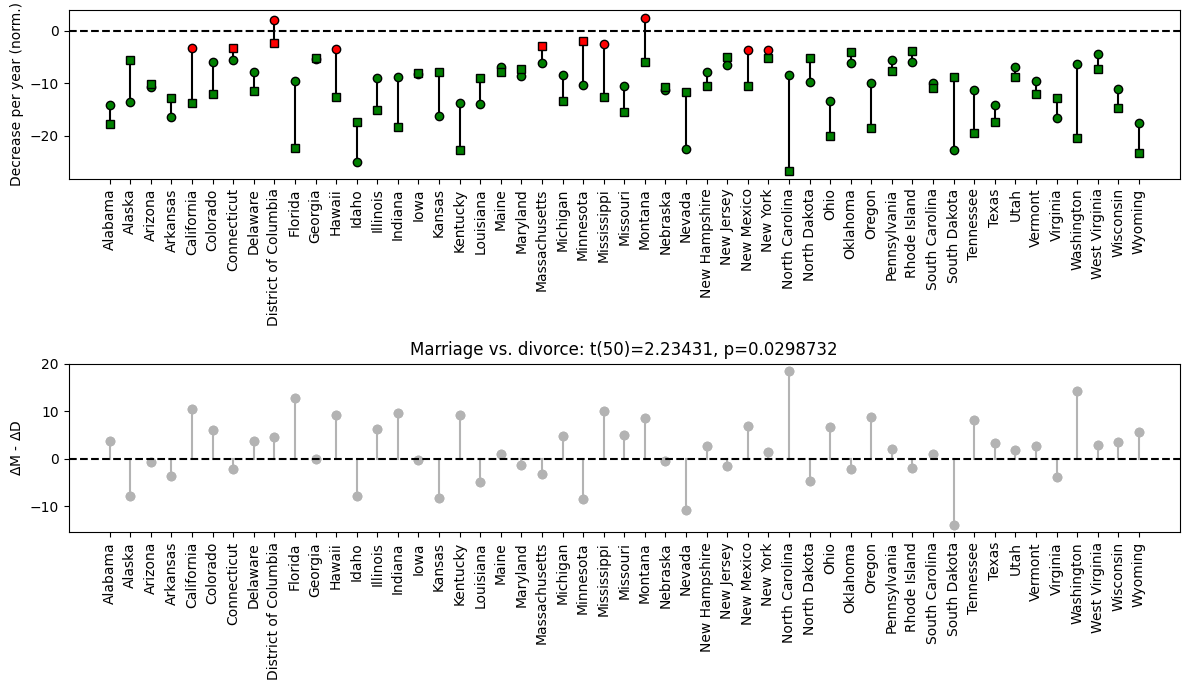

In [19]:
# running linear regression to get the slopes of the trend line for each state and also for both rates.
fig, ax = plt.subplots(2,1,figsize=(12,7))

# initialize slope differences vector
MvsD = np.zeros(len(m_states)+1)

for rowi in range(1,len(m_states)+1):
    
    # running regression (includes the intercept!)
    bM,intercept,r,pM,seM = stats.linregress(m_years,M.loc[rowi]) #slope, intercept, Pearson R value, p value, standard error
    bD,intercept,r,pD,seD = stats.linregress(d_years,D.loc[rowi])
    
    # normalizing beta coefficients
    bM = bM / seM
    bD = bD / seD
    
    # plot the slope values
    ax[0].plot([rowi,rowi],[bM,bD],'k')
    ax[0].plot(rowi,bM,'ko',markerfacecolor=color[bool(pM<pvalThresh)])
    ax[0].plot(rowi,bD,'ks',markerfacecolor=color[bool(pD<pvalThresh)])
    
    # plot the slope differences
    ax[1].plot([rowi,rowi],[bM-bD, 0],'k-',color=[.7,.7,.7])
    ax[1].plot([rowi,rowi],[bM-bD,bM-bD],'ko',color=[.7,.7,.7])
    
    # store the slope differences for subsequent t-test
    MvsD[rowi] = bM-bD


# make the plot look nicer
for i in range(2):
    ax[i].set_xticks(range(1,52))
    ax[i].set_xticklabels(d_states,rotation=90)
    ax[i].set_xlim([-1,53])
    ax[i].plot([-1,53],[0,0],'k--')

ax[0].set_ylabel('Decrease per year (norm.)')
ax[1].set_ylabel('$\Delta$M - $\Delta$D')


### ttest on whether the M-vs-D rates are really different
t,p = stats.ttest_1samp(MvsD,0)
df = len(MvsD)-2

# set the title
ax[1].set_title('Marriage vs. divorce: t(%g)=%g, p=%g'%(df,t,p))
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

<b>Observations</b>
- The states of <b>Montana</b> and <b>District of Columbia</b> has a non-significant positive slopes for the marriage rate, which is little surprising to the overall country trend.
- For most states we have significant decrease in both marriage and divorce rates.

- The second plot actually tells us whether the rate of decline in marriages and divoirces are same. 
- To test the significance of difference, I ran the 1-sample t-test against zero. It is statistically significant with degree of freedom of 50. So for the last 30 yrs, fewer people are gettings married but even fewer people are gettings divorced.
</div>
